In [1]:
import pandas as pd

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns


In [3]:
df = pd.read_csv(r'C:\Users\Mangesh\Desktop\1 month\Projects\OTT Platform Business Analysis\Dataset\cleaned_dataset.csv')

In [4]:
df.head()

,title,type,description,release_year,age_certification,runtime,genres,production_countries,seasons,imdb_score,imdb_votes,tmdb_popularity,tmdb_score
0,The Three Stooges,SHOW,The Three Stooges were an American vaudeville ...,1934,TV-PG,19,"['comedy', 'family', 'animation', 'action', 'f...",['US'],26.0,8.6,1092.0,15.424,7.6
1,The General,MOVIE,"During America’s Civil War, Union spies steal ...",1926,TV-G,78,"['action', 'drama', 'war', 'western', 'comedy'...",['US'],Not Applicable,8.2,89766.0,8.647,8.0
2,The Best Years of Our Lives,MOVIE,It's the hope that sustains the spirit of ever...,1946,TV-G,171,"['romance', 'war', 'drama']",['US'],Not Applicable,8.1,63026.0,8.435,7.8
3,His Girl Friday,MOVIE,"Hildy, the journalist former wife of newspaper...",1940,TV-G,92,"['comedy', 'drama', 'romance']",['US'],Not Applicable,7.8,57835.0,11.270,7.4
4,In a Lonely Place,MOVIE,An aspiring actress begins to suspect that her...,1950,TV-G,94,"['thriller', 'drama', 'romance']",['US'],Not Applicable,7.9,30924.0,8.273,7.6


In [5]:
df.columns

Index(['title', 'type', 'description', 'release_year', 'age_certification',
       'runtime', 'genres', 'production_countries', 'seasons', 'imdb_score',
       'imdb_votes', 'tmdb_popularity', 'tmdb_score'],
      dtype='object')

# 1. Identifying the different types of content available on the platform. 

1.1 Movies v/s Shows

In [6]:
dfgrp1 = df.groupby(['type']).nunique().reset_index()

In [7]:
dfgrp1[['type', 'title']]

,type,title
0,MOVIE,8418
1,SHOW,1355


In [8]:
dfgrp1['title'] = dfgrp1['title'].astype('float')

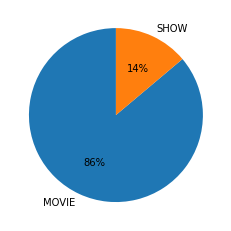

In [9]:
plt.pie(dfgrp1['title'],labels = dfgrp1['type'] , autopct = '%1.0f%%', startangle = 90)
plt.show()

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9868 entries, 0 to 9867
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   title                 9868 non-null   object 
 1   type                  9868 non-null   object 
 2   description           9868 non-null   object 
 3   release_year          9868 non-null   int64  
 4   age_certification     9868 non-null   object 
 5   runtime               9868 non-null   int64  
 6   genres                9868 non-null   object 
 7   production_countries  9868 non-null   object 
 8   seasons               9868 non-null   object 
 9   imdb_score            9868 non-null   float64
 10  imdb_votes            9868 non-null   float64
 11  tmdb_popularity       9868 non-null   float64
 12  tmdb_score            9868 non-null   float64
dtypes: float64(4), int64(2), object(7)
memory usage: 1002.3+ KB


1.2 Production Countries

1.2.1 For Movies + Shows

In [11]:
df_pc_grp = df.groupby('production_countries')
df_pc_grp = df_pc_grp[['title']].nunique().reset_index()
df_pc_grp = df_pc_grp.sort_values('title', ascending = False).iloc[0:5]

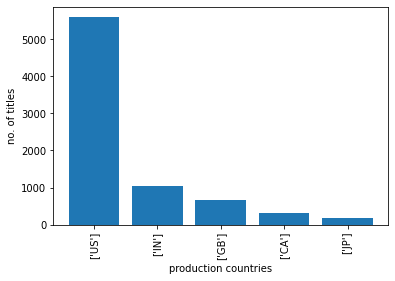

In [12]:
plt.bar(x = df_pc_grp['production_countries'] , height = df_pc_grp['title'])
plt.xticks(rotation = 90)
plt.xlabel('production countries')
plt.ylabel('no. of titles')
plt.show()

1.2.2 For Movies

In [13]:
df_movies = df[df['type'] == 'MOVIE']
df_movies_pc_grp = df_movies.groupby('production_countries')
df_movies_pc_grp = df_movies_pc_grp[['title']].nunique().reset_index()
df_movies_pc_grp = df_movies_pc_grp.sort_values('title', ascending = False).iloc[0:5]


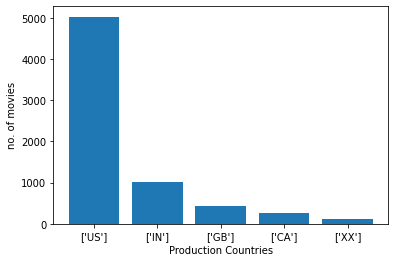

In [14]:
plt.bar(x = df_movies_pc_grp['production_countries'] , height = df_movies_pc_grp['title'])
plt.xlabel('Production Countries')
plt.ylabel('no. of movies')
plt.show()

In [15]:
df_shows = df[df['type'] == 'SHOW']
df_shows_pc_grp = df_shows.groupby('production_countries')
df_shows_pc_grp = df_shows_pc_grp[['title']].nunique().reset_index()
df_shows_pc_grp = df_shows_pc_grp.sort_values('title', ascending = False).iloc[0:5]


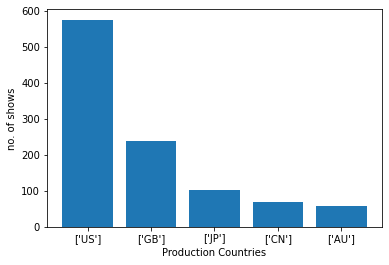

In [16]:
plt.bar(x = df_shows_pc_grp['production_countries'] , height = df_shows_pc_grp['title'])
plt.xlabel('Production Countries')
plt.ylabel('no. of shows')
plt.show()

1.3 Genres

1.3.1. Movies + Shows

In [17]:
df_genre_grp = df.groupby('genres')
df_genre_grp = df_genre_grp[['title']].nunique().reset_index()
df_genre_grp = df_genre_grp.sort_values('title', ascending = False).iloc[0:5]

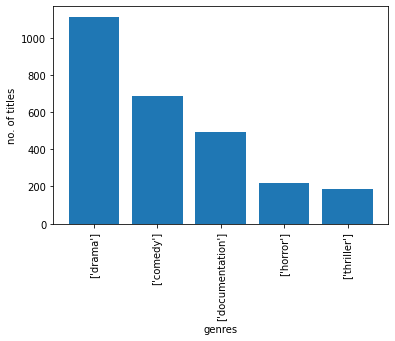

In [18]:
plt.bar(x = df_genre_grp['genres'] , height = df_genre_grp['title'])
plt.xticks(rotation = 90)
plt.xlabel('genres')
plt.ylabel('no. of titles')
plt.show()

1.3.2. Movies

In [19]:
df_movies_genre_grp = df_movies.groupby('genres')
df_movies_genre_grp = df_movies_genre_grp[['title']].nunique().reset_index()
df_movies_genre_grp = df_movies_genre_grp.sort_values('title', ascending = False).iloc[0:5]

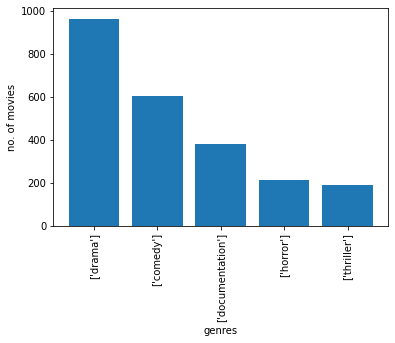

In [20]:
plt.bar(x = df_movies_genre_grp['genres'] , height = df_movies_genre_grp['title'])
plt.xticks(rotation = 90)
plt.xlabel('genres')
plt.ylabel('no. of movies')
plt.show()

1.3.3. Shows

In [21]:
df_shows_genre_grp = df_shows.groupby('genres')
df_shows_genre_grp = df_shows_genre_grp[['title']].nunique().reset_index()
df_shows_genre_grp = df_shows_genre_grp.sort_values('title', ascending = False).iloc[0:5]

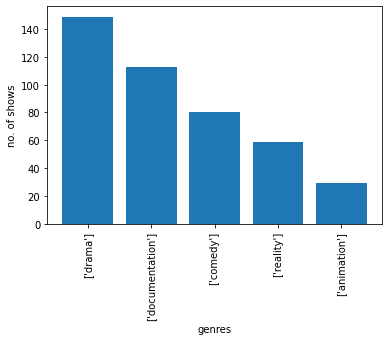

In [22]:
plt.bar(x = df_shows_genre_grp['genres'] , height = df_shows_genre_grp['title'])
plt.xticks(rotation = 90)
plt.xlabel('genres')
plt.ylabel('no. of shows')
plt.show()

1.4 Age Certifications

1.4.1 Movies + Shows

In [23]:
df_ac_grp = df.groupby('age_certification')
df_ac_grp = df_ac_grp[['title']].nunique().reset_index()
df_ac_grp = df_ac_grp.sort_values('title', ascending = False).iloc[0:5]

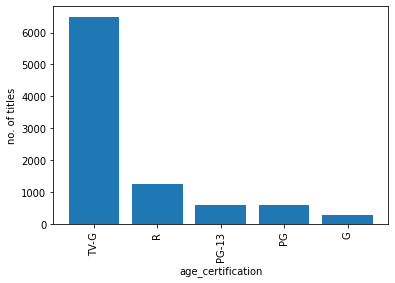

In [24]:
plt.bar(x = df_ac_grp['age_certification'] , height = df_ac_grp['title'])
plt.xticks(rotation = 90)
plt.xlabel('age_certification')
plt.ylabel('no. of titles')
plt.show()

1.4.2. Movies

In [25]:
df_movies_ac_grp = df_movies.groupby('age_certification')
df_movies_ac_grp = df_movies_ac_grp[['title']].nunique().reset_index()
df_movies_ac_grp = df_movies_ac_grp.sort_values('title', ascending = False).iloc[0:5]

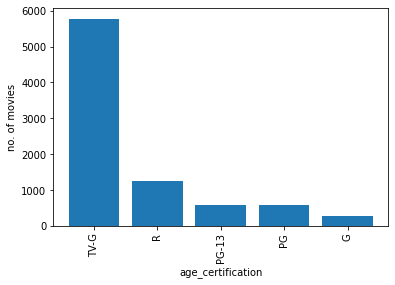

In [26]:
plt.bar(x = df_movies_ac_grp['age_certification'] , height = df_movies_ac_grp['title'])
plt.xticks(rotation = 90)
plt.xlabel('age_certification')
plt.ylabel('no. of movies')
plt.show()

1.4.3. Shows

In [27]:
df_shows_ac_grp = df_shows.groupby('age_certification')
df_shows_ac_grp = df_shows_ac_grp[['title']].nunique().reset_index()
df_shows_ac_grp = df_shows_ac_grp.sort_values('title', ascending = False).iloc[0:5]

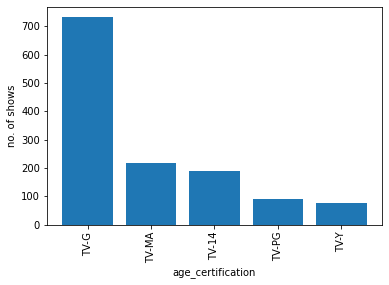

In [28]:
plt.bar(x = df_shows_ac_grp['age_certification'] , height = df_shows_ac_grp['title'])
plt.xticks(rotation = 90)
plt.xlabel('age_certification')
plt.ylabel('no. of shows')
plt.show()

# Study the popularity of different types of content around the world

1. Assessing the popularity of type of content

In [29]:
dfgrp2 = df.groupby(['type'])

In [30]:
dfgrp2 = dfgrp2[['imdb_score','tmdb_popularity','tmdb_score','imdb_votes']].mean().reset_index()

In [31]:
dfgrp2[['imdb_score','tmdb_popularity','tmdb_score','imdb_votes']]

,imdb_score,tmdb_popularity,tmdb_score,imdb_votes
0,5.832147,5.604632,5.834038,7509.172953
1,6.975018,13.348922,6.949742,8845.383567


[]

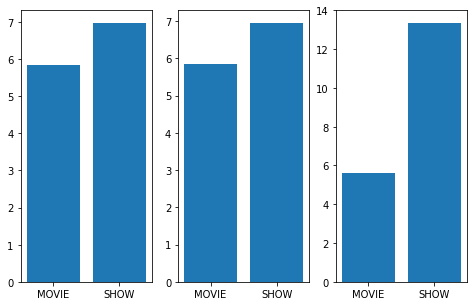

In [32]:
fig, ax = plt.subplots(1, 3, figsize=(8, 5), sharex=False, sharey=False)

ax[0].bar(height = dfgrp2['imdb_score'] , x = dfgrp2['type'] )
ax[1].bar(height = dfgrp2['tmdb_score'] , x = dfgrp2['type'] )
ax[2].bar(height = dfgrp2['tmdb_popularity'] , x = dfgrp2['type'] )
plt.plot()

2. Assessing Popularity of Genres

2.1. For Movies + Shows

In [33]:
df_genre_grp_rp = df.groupby('genres')
df_genre_grp_rp = df_genre_grp_rp[['imdb_score','tmdb_popularity','tmdb_score', 'imdb_votes']].mean().reset_index()
df_genre_grp_rp = df_genre_grp_rp.sort_values(by=['imdb_votes', 'imdb_score', 'tmdb_popularity'], ascending  = [False,False,False]).iloc[0:5]
df_genre_grp_rp[['genres','imdb_votes','imdb_score','tmdb_popularity']]

,genres,imdb_votes,imdb_score,tmdb_popularity
1532,"['scifi', 'action', 'horror', 'thriller']",648063.0,7.0,121.595
100,"['action', 'drama', 'war', 'history', 'romance...",508388.0,8.5,344.245
1837,"['thriller', 'fantasy', 'scifi', 'action', 'eu...",463640.0,7.6,39.211
824,"['drama', 'family', 'fantasy', 'romance', 'com...",444243.0,8.6,26.495
1812,"['thriller', 'drama', 'scifi', 'european']",410474.0,7.3,30.819


2.2. For Movies

In [34]:
df_movies_genre_grp_rp = df_movies.groupby('genres')
df_movies_genre_grp_rp = df_movies_genre_grp_rp[['imdb_score','tmdb_popularity','tmdb_score', 'imdb_votes']].mean().reset_index()
df_movies_genre_grp_rp = df_movies_genre_grp_rp.sort_values(by=['imdb_votes', 'imdb_score', 'tmdb_popularity'], ascending  = [False,False,False]).iloc[0:5]
df_movies_genre_grp_rp[['genres','imdb_votes','imdb_score','tmdb_popularity']]

,genres,imdb_votes,imdb_score,tmdb_popularity
1295,"['scifi', 'action', 'horror', 'thriller']",648063.0,7.0,121.595
1542,"['thriller', 'fantasy', 'scifi', 'action', 'eu...",463640.0,7.6,39.211
659,"['drama', 'family', 'fantasy', 'romance', 'com...",444243.0,8.6,26.495
618,"['drama', 'crime', 'thriller', 'european']",433096.0,7.8,15.621
1517,"['thriller', 'drama', 'scifi', 'european']",410474.0,7.3,30.819


2.3. For shows

In [35]:
df_shows_genre_grp_rp = df_shows.groupby('genres')
df_shows_genre_grp_rp = df_shows_genre_grp_rp[['imdb_score','tmdb_popularity','tmdb_score', 'imdb_votes']].mean().reset_index()
df_shows_genre_grp_rp = df_shows_genre_grp_rp.sort_values(by=['imdb_votes', 'imdb_score', 'tmdb_popularity'], ascending  = [False,False,False]).iloc[0:5]
df_shows_genre_grp_rp[['genres','imdb_votes','imdb_score','tmdb_popularity']]

,genres,imdb_votes,imdb_score,tmdb_popularity
35,"['action', 'drama', 'war', 'history', 'romance...",508388.0,8.5,344.245
130,"['comedy', 'drama', 'crime']",404920.0,8.8,352.657
382,"['scifi', 'action', 'crime', 'drama', 'comedy']",362539.0,8.7,250.632
428,"['scifi', 'drama', 'thriller', 'crime', 'horror']",304893.0,8.0,149.195
422,"['scifi', 'drama', 'fantasy', 'romance', 'acti...",142891.0,8.3,50.995


3. Assessing the popularity of Production Countries

3.1. For Movies + Shows

In [36]:
df_pc_grp_rp = df.groupby('production_countries')
df_pc_grp_rp = df_pc_grp_rp[['imdb_score','tmdb_popularity','tmdb_score', 'imdb_votes']].mean().reset_index()
df_pc_grp_rp = df_pc_grp_rp.sort_values(by=['imdb_votes', 'imdb_score', 'tmdb_popularity'], ascending  = [False,False,False]).iloc[0:5]
df_pc_grp_rp[['production_countries','imdb_votes','imdb_score','tmdb_popularity']]

,production_countries,imdb_votes,imdb_score,tmdb_popularity
493,"['ZA', 'US', 'NZ', 'CA']",670344.000000,7.900000,80.387
436,"['US', 'FR', 'GB']",306270.000000,7.700000,19.293
166,"['FR', 'GB', 'US']",286962.333333,7.333333,32.436
16,"['AU', 'GB', 'US']",231965.000000,6.200000,174.607
111,"['DE', 'SE', 'DK']",215478.000000,7.800000,16.726


3.2. For Movies

In [38]:
df_movies_pc_grp_rp = df_movies.groupby('production_countries')
df_movies_pc_grp_rp = df_movies_pc_grp_rp[['imdb_score','tmdb_popularity','tmdb_score', 'imdb_votes']].mean().reset_index()
df_movies_pc_grp_rp = df_movies_pc_grp_rp.sort_values(by=['imdb_votes', 'imdb_score', 'tmdb_popularity'], ascending  = [False,False,False]).iloc[0:5]
df_movies_pc_grp_rp[['production_countries','imdb_votes','imdb_score','tmdb_popularity']]

,production_countries,imdb_votes,imdb_score,tmdb_popularity
469,"['ZA', 'US', 'NZ', 'CA']",670344.000000,7.900000,80.387
414,"['US', 'FR', 'GB']",306270.000000,7.700000,19.293
155,"['FR', 'GB', 'US']",286962.333333,7.333333,32.436
15,"['AU', 'GB', 'US']",231965.000000,6.200000,174.607
104,"['DE', 'SE', 'DK']",215478.000000,7.800000,16.726


3.3. For Shows

In [39]:
df_shows_pc_grp_rp = df_shows.groupby('production_countries')
df_shows_pc_grp_rp = df_shows_pc_grp_rp[['imdb_score','tmdb_popularity','tmdb_score', 'imdb_votes']].mean().reset_index()
df_shows_pc_grp_rp = df_shows_pc_grp_rp.sort_values(by=['imdb_votes', 'imdb_score', 'tmdb_popularity'], ascending  = [False,False,False]).iloc[0:5]
df_shows_pc_grp_rp[['production_countries','imdb_votes','imdb_score','tmdb_popularity']]

,production_countries,imdb_votes,imdb_score,tmdb_popularity
59,"['US', 'AU']",36483.000000,8.300000,28.242000
37,['IE'],20663.600000,6.820000,10.472600
60,"['US', 'BE', 'CA', 'FR']",17859.000000,8.200000,25.766000
68,['US'],14905.162609,6.883478,15.568273
11,['CA'],11269.081633,6.500000,12.393082


4. Assessing the popularity of Age-Certifications

4.1. For Movies + Shows

In [40]:
df_ac_grp_rp = df.groupby('age_certification')
df_ac_grp_rp = df_ac_grp_rp[['imdb_score','tmdb_popularity','tmdb_score', 'imdb_votes']].mean().reset_index()
df_ac_grp_rp = df_ac_grp_rp.sort_values(by=['imdb_votes', 'imdb_score', 'tmdb_popularity'], ascending  = [False,False,False]).iloc[0:5]
df_ac_grp_rp[['age_certification','imdb_votes','imdb_score','tmdb_popularity']]

,age_certification,imdb_votes,imdb_score,tmdb_popularity
3,PG-13,33801.960034,5.984014,11.290699
7,TV-MA,29038.668203,7.335945,27.245774
4,R,21989.964371,5.691513,11.146736
5,TV-14,20704.920213,6.976596,21.873359
2,PG,11341.057560,5.957560,10.569223


4.2. For Movies

In [41]:
df_movies_ac_grp_rp = df_movies.groupby('age_certification')
df_movies_ac_grp_rp = df_movies_ac_grp_rp[['imdb_score','tmdb_popularity','tmdb_score', 'imdb_votes']].mean().reset_index()
df_movies_ac_grp_rp = df_movies_ac_grp_rp.sort_values(by=['imdb_votes', 'imdb_score', 'tmdb_popularity'], ascending  = [False,False,False]).iloc[0:5]
df_movies_ac_grp_rp[['age_certification','imdb_votes','imdb_score','tmdb_popularity']]

,age_certification,imdb_votes,imdb_score,tmdb_popularity
3,PG-13,33801.960034,5.984014,11.290699
4,R,21989.964371,5.691513,11.146736
2,PG,11341.057560,5.957560,10.569223
0,G,3091.834572,5.963197,4.511699
1,NC-17,2256.192308,5.369231,5.885462


4.3. For Shows

In [42]:
df_shows_ac_grp_rp = df_shows.groupby('age_certification')
df_shows_ac_grp_rp = df_shows_ac_grp_rp[['imdb_score','tmdb_popularity','tmdb_score', 'imdb_votes']].mean().reset_index()
df_shows_ac_grp_rp = df_shows_ac_grp_rp.sort_values(by=['imdb_votes', 'imdb_score', 'tmdb_popularity'], ascending  = [False,False,False]).iloc[0:5]
df_shows_ac_grp_rp[['age_certification','imdb_votes','imdb_score','tmdb_popularity']]

,age_certification,imdb_votes,imdb_score,tmdb_popularity
2,TV-MA,29038.668203,7.335945,27.245774
0,TV-14,20704.920213,6.976596,21.873359
3,TV-PG,10387.582418,7.372527,15.137978
5,TV-Y7,3797.211538,6.619231,15.524365
4,TV-Y,1337.185897,6.479487,10.350731


# Analyzing the trends over the years 

1. Trend in the production of shows over the years

In [43]:
dfgrp5_1 = df[df['type'] == 'SHOW'].groupby(['release_year'])
dfgrp5_1 = dfgrp5_1.nunique().reset_index()
dfgrp5_1

,release_year,title,type,description,age_certification,runtime,genres,production_countries,seasons,imdb_score,imdb_votes,tmdb_popularity,tmdb_score
0,1934,1,1,1,1,1,1,1,1,1,1,1,1
1,1950,1,1,1,1,1,1,1,1,1,1,1,1
2,1951,1,1,1,1,1,1,1,1,1,1,1,1
3,1952,1,1,1,1,1,1,1,1,1,1,1,1
4,1953,2,1,2,1,1,2,1,2,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
59,2018,117,1,116,6,55,82,19,6,41,94,92,34
60,2019,104,1,101,6,46,60,18,5,40,85,75,36
61,2020,124,1,120,6,55,57,21,4,36,77,92,33
62,2021,141,1,130,5,52,63,21,2,46,88,98,36


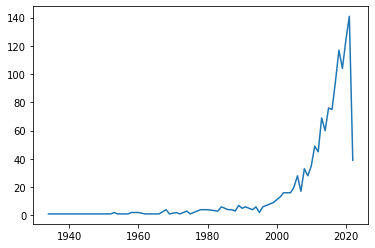

In [44]:
plt.plot(dfgrp5_1['release_year'] , dfgrp5_1['title'])
plt.show()

In [45]:
dfgrp5_2 = df[df['type'] == 'MOVIE'].groupby(['release_year'])
dfgrp5_2 = dfgrp5_2.nunique().reset_index()
dfgrp5_2


,release_year,title,type,description,age_certification,runtime,genres,production_countries,seasons,imdb_score,imdb_votes,tmdb_popularity,tmdb_score
0,1912,1,1,1,1,1,1,1,1,1,1,1,1
1,1914,2,1,2,1,2,2,1,1,2,2,2,2
2,1915,5,1,5,1,3,4,1,1,4,5,5,4
3,1916,2,1,2,1,2,2,1,1,2,2,2,2
4,1917,1,1,1,1,1,1,1,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
105,2018,568,1,559,6,119,217,83,1,66,428,439,57
106,2019,703,1,695,5,134,252,102,1,68,473,545,66
107,2020,574,1,554,6,122,178,62,1,69,344,428,62
108,2021,713,1,691,6,131,204,52,1,76,409,496,65


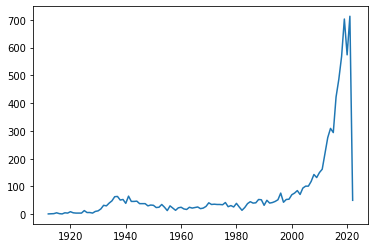

In [46]:
plt.plot(dfgrp5_2['release_year'] , dfgrp5_2['title'])
plt.show()